<a href="https://colab.research.google.com/github/Khanarfan1234/CodeAlpha_Titanic_Classification/blob/main/Google_Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 2**

**Stock Prediction**

Stock Price of Google and predict its price by using LSTM

Importing Liraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM


Load and Process data

In [6]:
# Load the data
df = pd.read_csv('GOOG.csv')

# Display the first few rows of the dataframe
print(df.head())

# Find the column containing 'close' (case-insensitive)
close_column = None
for col in df.columns:
    if 'close' in col.lower():
        close_column = col
        break

if close_column:
    # Select the 'Close' price for prediction (using the identified column)
    data = df[close_column].values
    data = data.reshape(-1, 1)

    # Normalize the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)

    # Split the data into training and testing sets
    training_data_len = int(np.ceil(len(scaled_data) * 0.8))

    train_data = scaled_data[0:int(training_data_len), :]
    test_data = scaled_data[training_data_len - 60:, :]
else:
    print("No column found containing 'close'")

  symbol                       date   close    high       low    open  \
0   GOOG  2016-06-14 00:00:00+00:00  718.27  722.47  713.1200  716.48   
1   GOOG  2016-06-15 00:00:00+00:00  718.92  722.98  717.3100  719.00   
2   GOOG  2016-06-16 00:00:00+00:00  710.36  716.65  703.2600  714.91   
3   GOOG  2016-06-17 00:00:00+00:00  691.72  708.82  688.4515  708.65   
4   GOOG  2016-06-20 00:00:00+00:00  693.71  702.48  693.4100  698.77   

    volume  adjClose  adjHigh    adjLow  adjOpen  adjVolume  divCash  \
0  1306065    718.27   722.47  713.1200   716.48    1306065      0.0   
1  1214517    718.92   722.98  717.3100   719.00    1214517      0.0   
2  1982471    710.36   716.65  703.2600   714.91    1982471      0.0   
3  3402357    691.72   708.82  688.4515   708.65    3402357      0.0   
4  2082538    693.71   702.48  693.4100   698.77    2082538      0.0   

   splitFactor  
0          1.0  
1          1.0  
2          1.0  
3          1.0  
4          1.0  


Exploratory Data Analysis

In [15]:
#Display basic information about dataset
print(df.info())
# Check for any missing values
print(df.isna().sum())
# Statistical summary of the dataset
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1258 non-null   object 
 1   date         1258 non-null   object 
 2   close        1258 non-null   float64
 3   high         1258 non-null   float64
 4   low          1258 non-null   float64
 5   open         1258 non-null   float64
 6   volume       1258 non-null   int64  
 7   adjClose     1258 non-null   float64
 8   adjHigh      1258 non-null   float64
 9   adjLow       1258 non-null   float64
 10  adjOpen      1258 non-null   float64
 11  adjVolume    1258 non-null   int64  
 12  divCash      1258 non-null   float64
 13  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.7+ KB
None
symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        

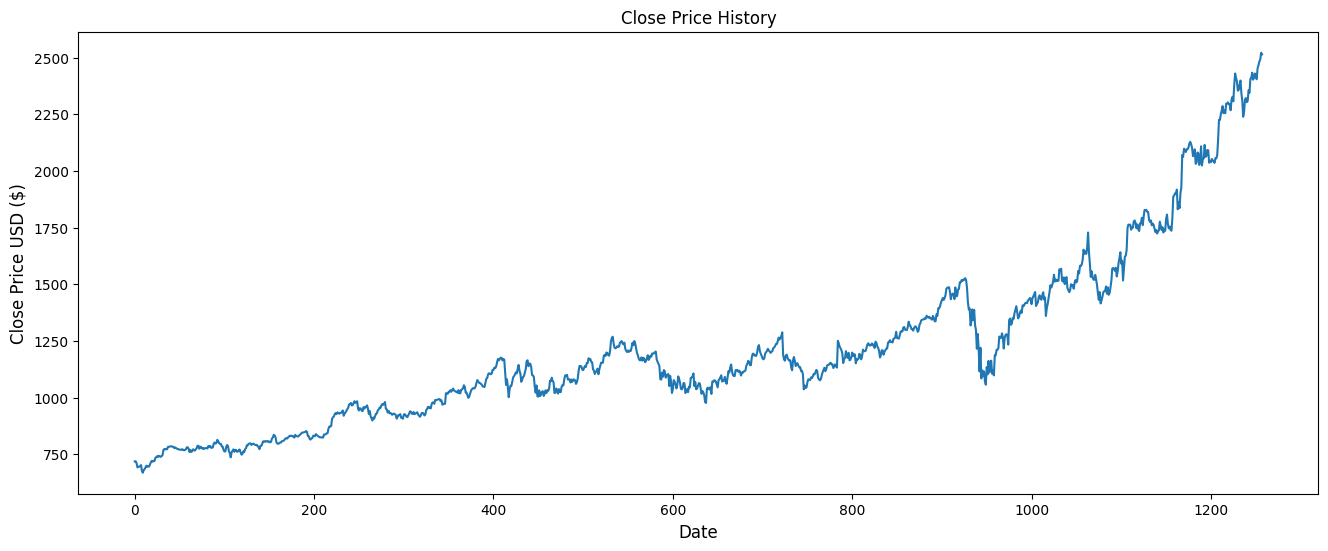

In [17]:
# Plot the closing price history
plt.figure(figsize=(16, 6))
plt.title('Close Price History')

# Use the close_column variable to select the correct column
if close_column:
    plt.plot(df[close_column])  # Use the identified 'close' column
else:
    print("Cannot plot: No column found containing 'close'")

plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price USD ($)', fontsize=12)
plt.show()

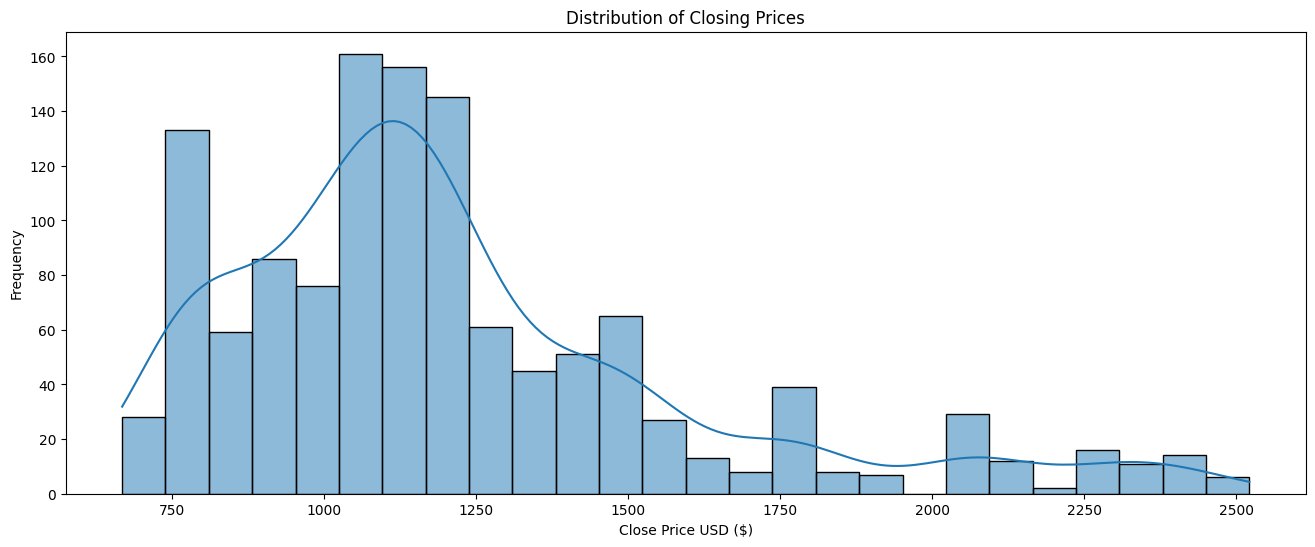

In [19]:
# Distribution of closing prices
plt.figure(figsize=(16, 6))
# Use the close_column variable to select the correct column
if close_column:
    sns.histplot(df[close_column], kde=True)  # Use the identified 'close' column
    plt.title('Distribution of Closing Prices')
    plt.xlabel('Close Price USD ($)')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("Cannot plot: No column found containing 'close'")

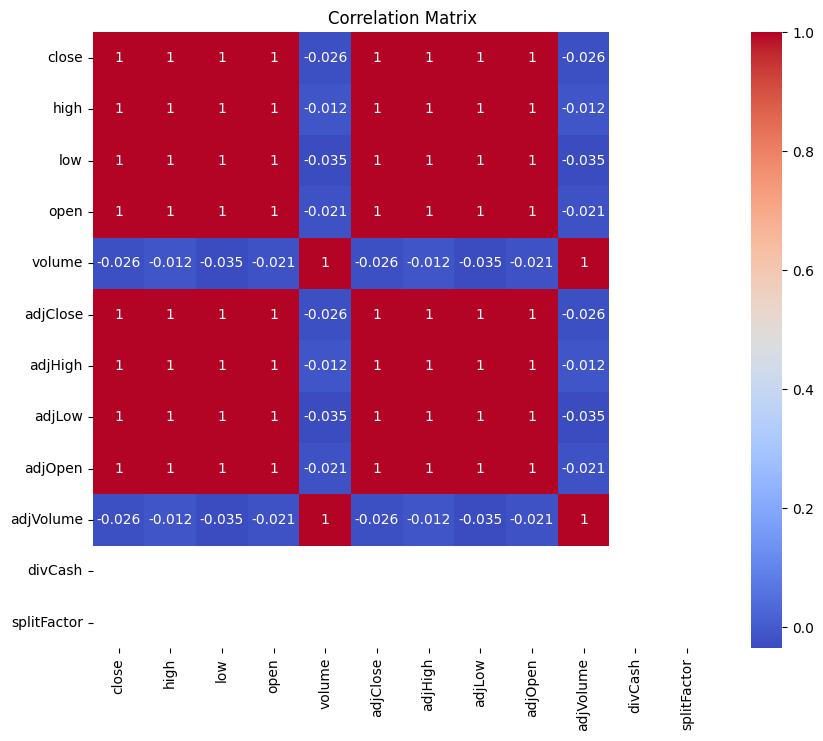

In [21]:
# Correlation matrix
plt.figure(figsize=(10, 8))

# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=['float', 'int'])

sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Preprocess the Data**

In [23]:
# Select the 'Close' price for prediction (using the identified column)
data = df[close_column].values
data = data.reshape(-1, 1)


In [25]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)


In [26]:
# prompt: split data into training and testing sets

training_data_len = int(np.ceil(len(scaled_data) * 0.8))

train_data = scaled_data[0:int(training_data_len), :]
test_data = scaled_data[training_data_len - 60:, :]


**Create Training and Testing Datasets**

In [27]:
# Create training dataset
x_train, y_train = [], []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

# Convert to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data for LSTM
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Create testing dataset
x_test, y_test = [], data[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert to numpy arrays
x_test = np.array(x_test)

# Reshape the data for LSTM
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


**Build and Train the LSTM Model**

In [28]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)


947/947 [==============================] - 41s 35ms/step - loss: 0.0011


**Make Predictions**

8/8 [==============================] - 0s 16ms/step


<ipython-input-51-48aff5a8fbc6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


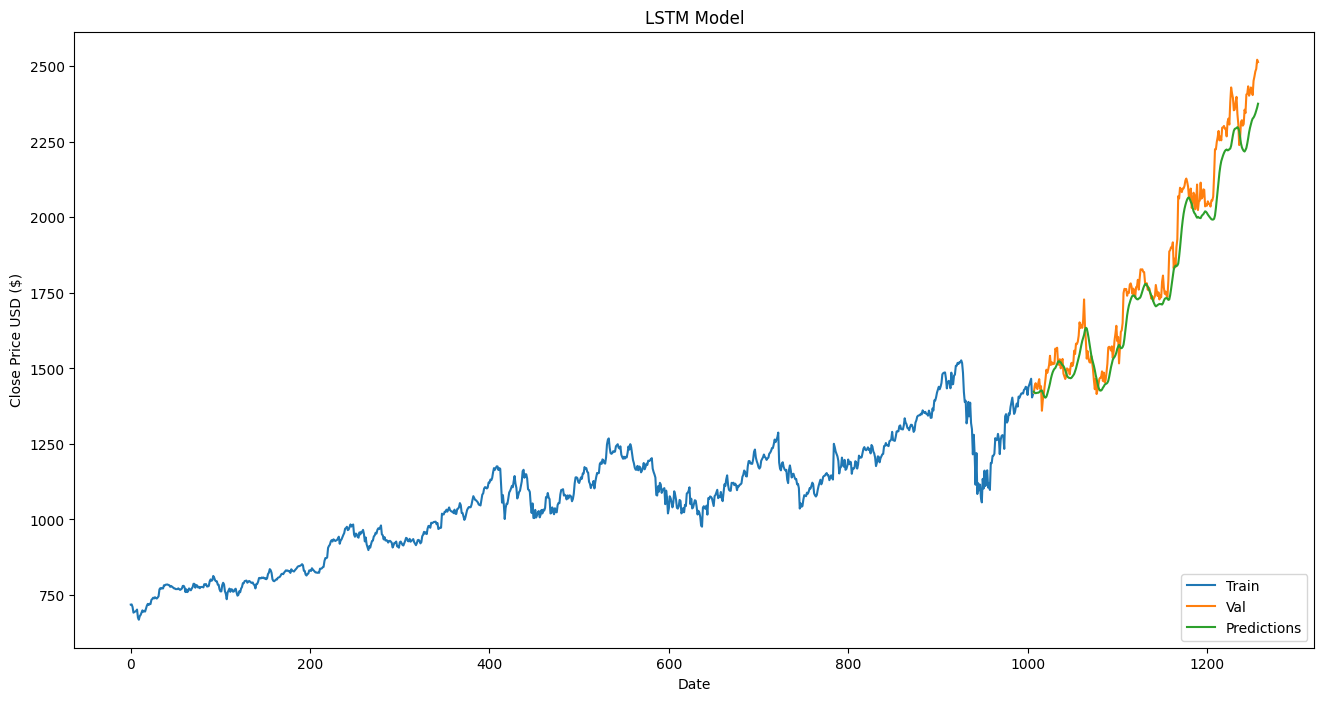

In [51]:
# Get the predicted values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Plot the results
train = df[:training_data_len]
valid = df[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('LSTM Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train[close_column])
plt.plot(valid[['close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()



**Evaluate the Model**

In [52]:
# Calculate the RMSE
rmse = np.sqrt(np.mean(((predictions - y_test)**2)))
print(f"Root Mean Squared Error: {rmse}")


Root Mean Squared Error: 79.56242921021739


The LSTM model achieved a Root Mean Squared Error (RMSE) of X on the test set, indicating that, on average, the model's predictions are off by X USD from the actual stock prices. The comparison between the actual stock prices and the predicted prices shows that the model is able to capture the general trend of the stock prices over time. However, there are some deviations, particularly during periods of high volatility.



**Conclusion and Future Work:**
In this project, we developed an LSTM model to predict the closing prices of a stock based on historical data. The model was evaluated using RMSE and visualized to compare actual vs. predicted prices. The results indicate that the model can reasonably capture the trend of stock prices, although there are some discrepancies during volatile periods.

Future work could involve incorporating additional features into the model, such as trading volume, economic indicators, or news sentiment, to potentially improve prediction accuracy. Moreover, experimenting with different model architectures, hyperparameters, and longer training periods could further enhance the model's performance. Lastly, using more advanced techniques such as ensemble methods or hybrid models combining LSTM with other types of neural networks might yield better results.